In [14]:
import pandas as pd
import numpy as np
import glob
import pickle
import comex_algoritms as cm


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [15]:
def _read_rank_list(filename):
    with open(filename, 'rb') as f:
        rank_list = pickle.load(f)
        
    rank_list = pd.DataFrame(rank_list)
    return rank_list

def plot_heatmap(plot_df, row):
    # Create a heatmap using seaborn
    plt.figure(figsize=(12, 8))
    original_cmap = 'PuBuGn'
    cmap = matplotlib.colormaps[original_cmap]
    inverse_cmap = cmap.reversed()    
    
    sns.heatmap(plot_df, cmap=cmap, xticklabels=False, yticklabels=False)
    
    # Draw rectangle edges
    plt.gca().set_frame_on(True)
    plt.gca().patch.set_edgecolor('black')
    plt.gca().patch.set_linewidth(1)
    
    plt.title('Selection of Dimensions Heatmap')
    plt.savefig(f'plots/heatmap_{row}.png')
    plt.show()
    
def calculate_doubles(rank_list):
    doubles = []
    for row in range(len(rank_list)):
        A = rank_list.iloc[row]['A']
        B = rank_list.iloc[row]['B']
        C = rank_list.iloc[row]['C']

        doubles.append(f'{A},{B}')
        doubles.append(f'{A},{C}')
        doubles.append(f'{B},{C}')
    
    doubles = pd.DataFrame(doubles).value_counts()
    unique_doubles = pd.DataFrame()
    unique_doubles['double']=doubles.index.values
    unique_doubles['count'] = doubles.values
    return unique_doubles

def plot_doubles(unique_doubles, row):
    x=unique_doubles[:20]['double'].astype(str)
    y=unique_doubles[:20]['count']
    plt.bar(x, y, color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.xlabel('Triplets')
    plt.ylabel('Count')
    plt.title('Top 20 Triplets Frequency')

    plt.xticks(rotation=45)

    plt.grid(axis='y', linestyle='--')

    for i, value in enumerate(y):
        plt.text(i, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(f'plots/bar_plot_{row}.png')
    plt.show()

In [16]:
# Get all CSV files in the folder starting with "rank"
pickle_files = glob.glob("temp_files/rank_list_*.pickle")
# Concatenate all DataFrames into a single DataFrame
rank_list = pd.concat(_read_rank_list(f) for f in pickle_files)

rank_list.reset_index(inplace=True, drop=True)
rank_list['cut_round'] = (rank_list.index // 100) + 1 

print(rank_list.shape)

(1985, 7)


In [17]:
sparse = cm._rank_list_to_sparse(rank_list)

plot_df = pd.DataFrame(columns=sparse.columns, index=sparse.columns)
plot_df.fillna(0, inplace=True)

### Heatmap for `iter=1`

20


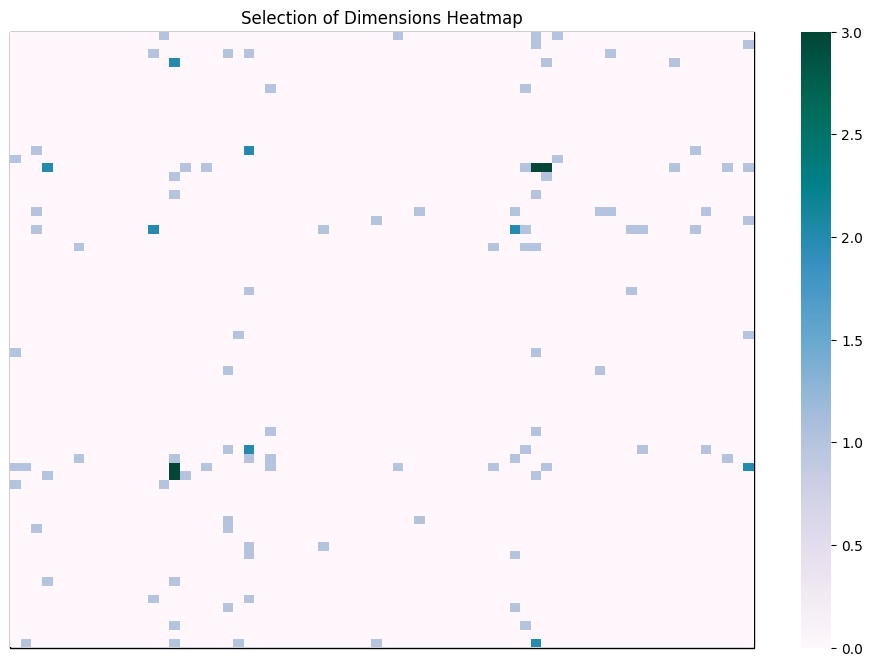

40


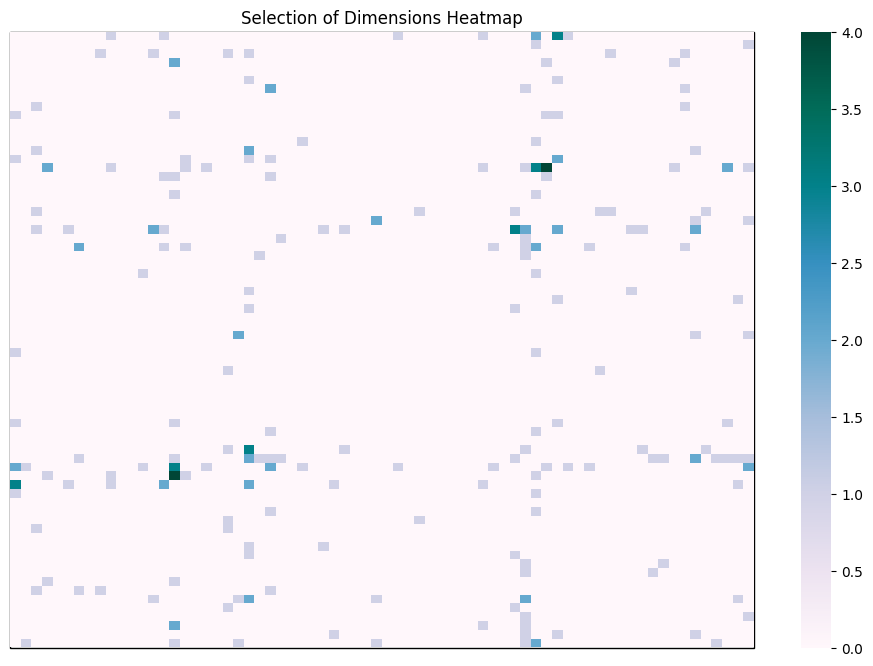

60


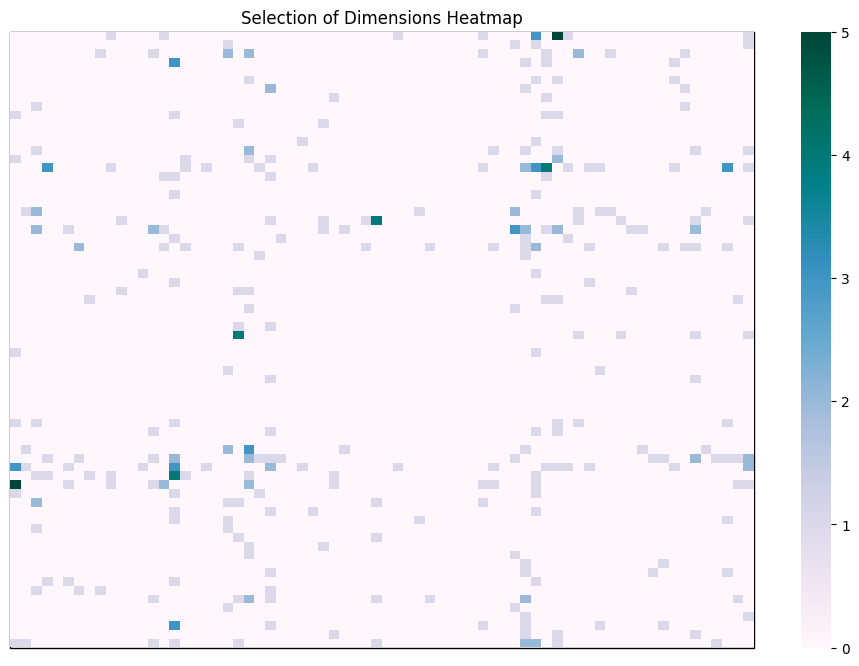

80


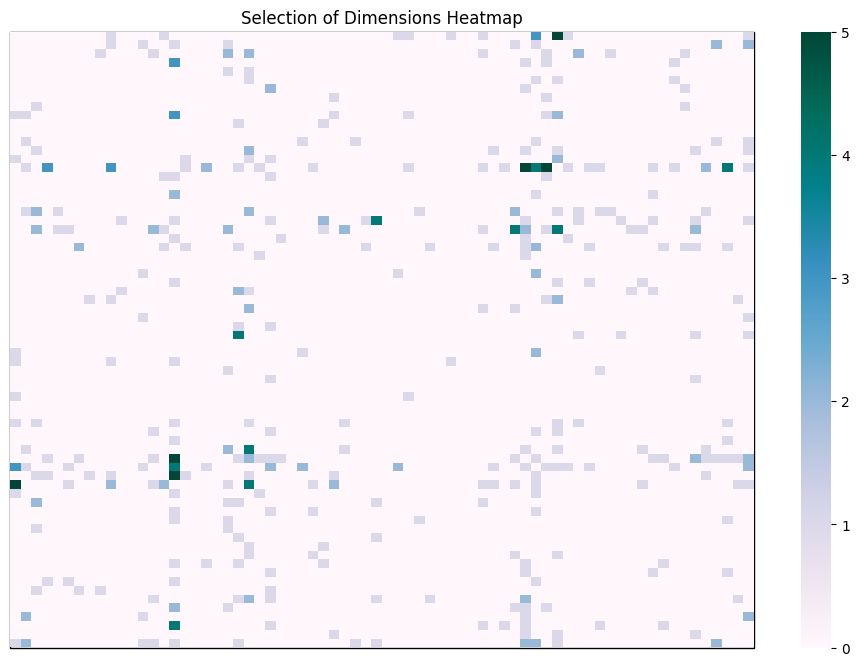

100


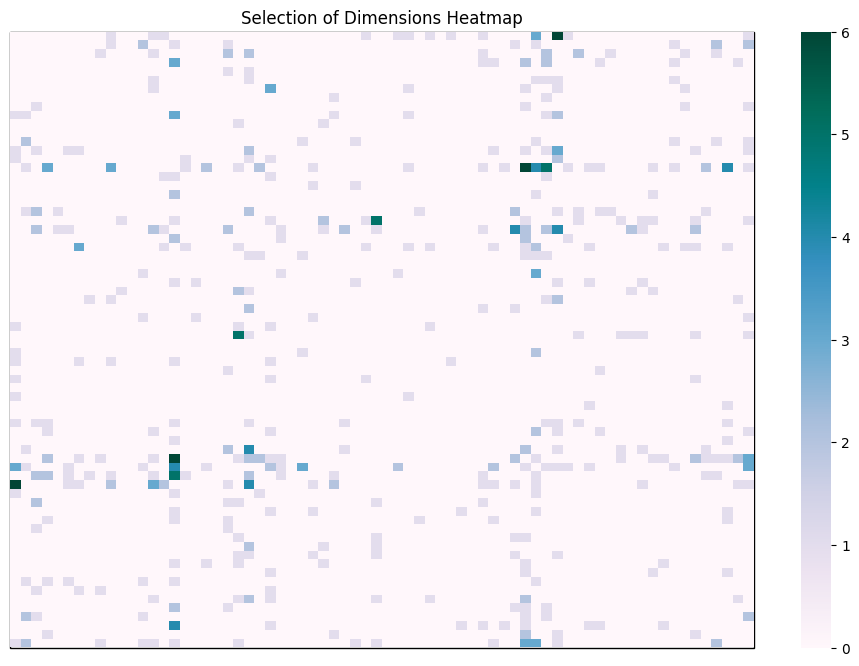

120


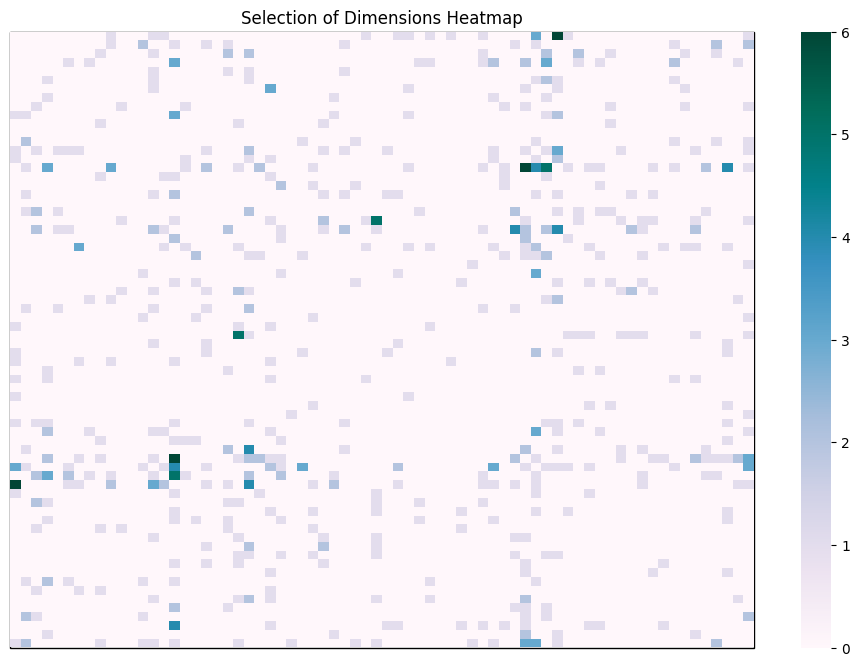

140


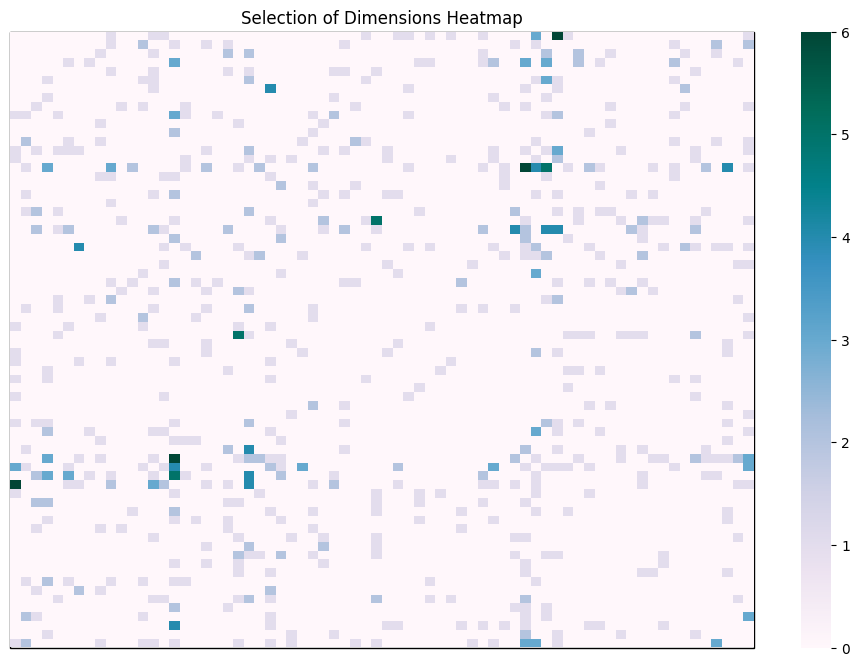

160


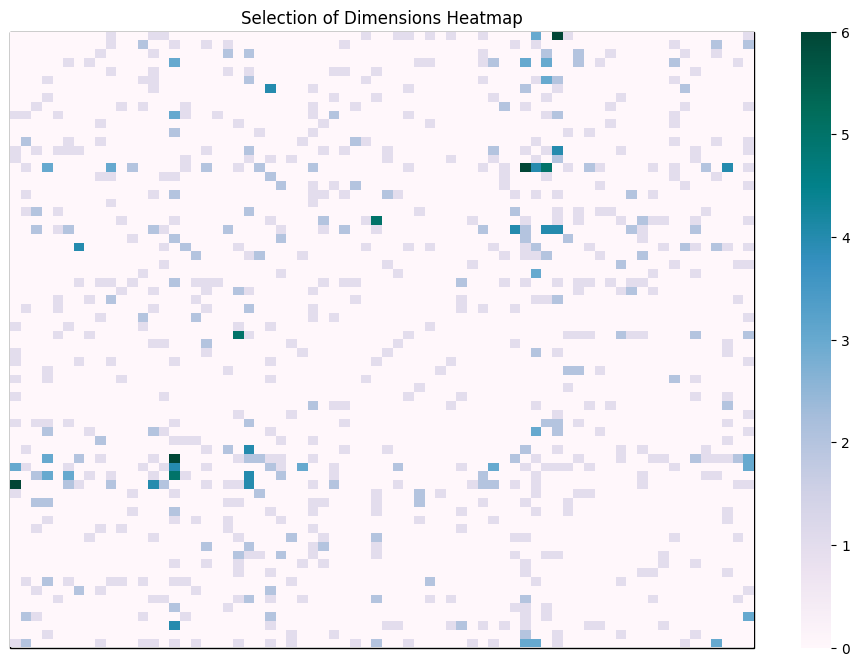

180


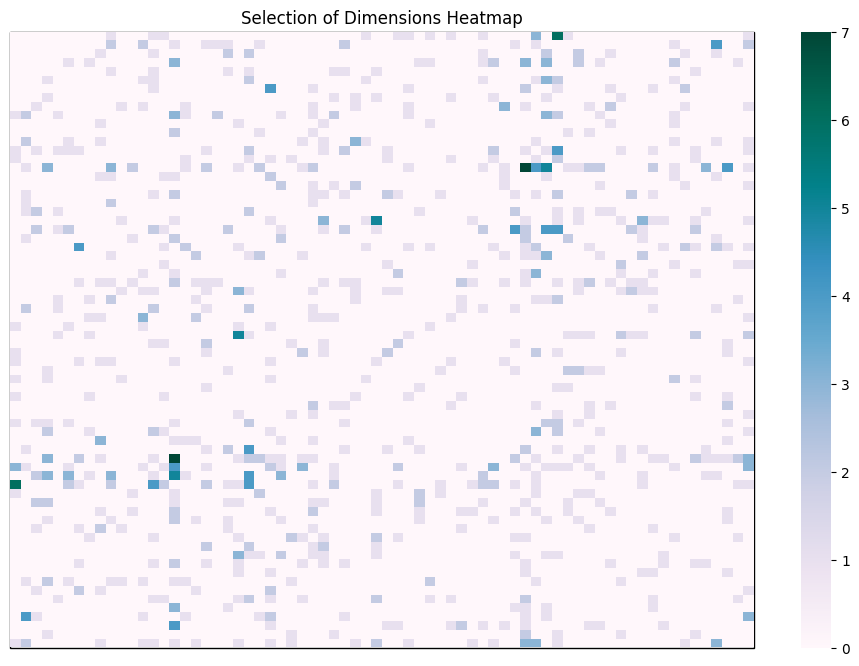

200


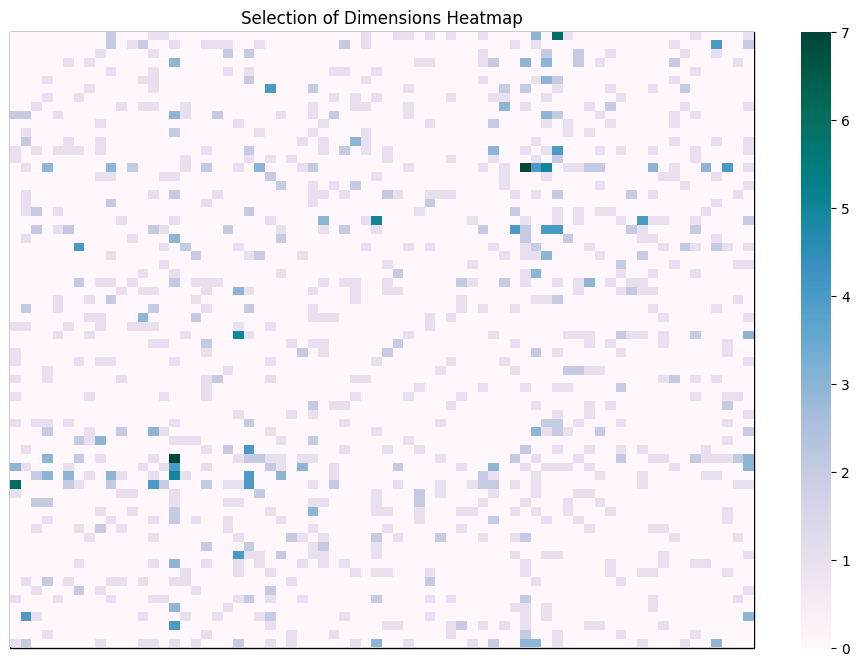

In [18]:
plot_df = pd.DataFrame(columns=sparse.columns, index=sparse.columns)
plot_df.fillna(0, inplace=True)

for row in range(len(rank_list[:200])+1):
    curr_cut = rank_list[1].iloc[row]
    a = curr_cut[0]
    b = curr_cut[1]
    c = curr_cut[2]
    
    plot_df[f'col_{a}'].loc[f'col_{b}'] += 1
    plot_df[f'col_{a}'].loc[f'col_{c}'] += 1

    plot_df[f'col_{b}'].loc[f'col_{a}'] += 1
    plot_df[f'col_{b}'].loc[f'col_{c}'] += 1

    plot_df[f'col_{c}'].loc[f'col_{a}'] += 1
    plot_df[f'col_{c}'].loc[f'col_{b}'] += 1

    if (row % 20 == 0) and (row>19):
        print(row)
        plot_heatmap(plot_df, row)

### Heatmap for `iter=2`

120


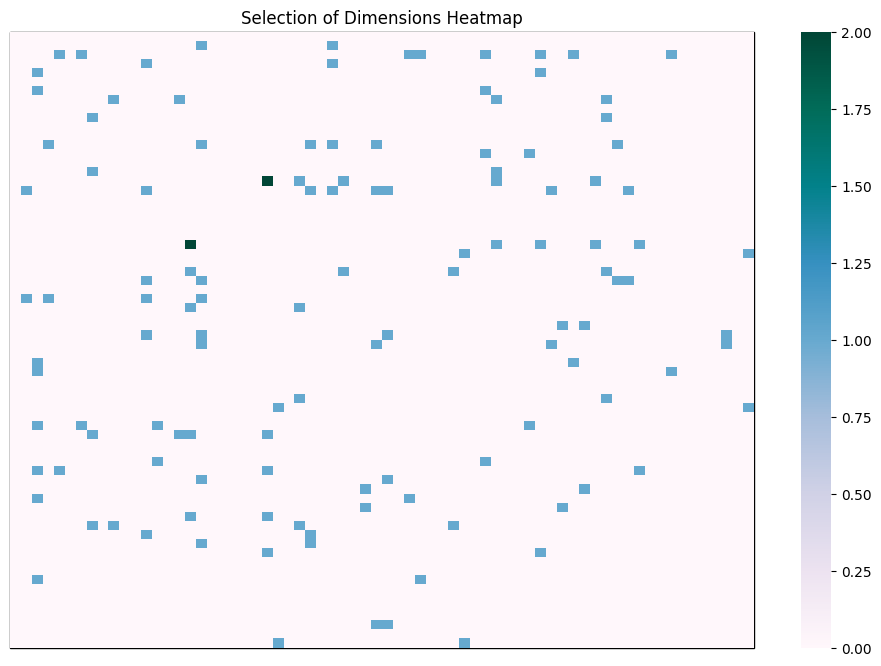

140


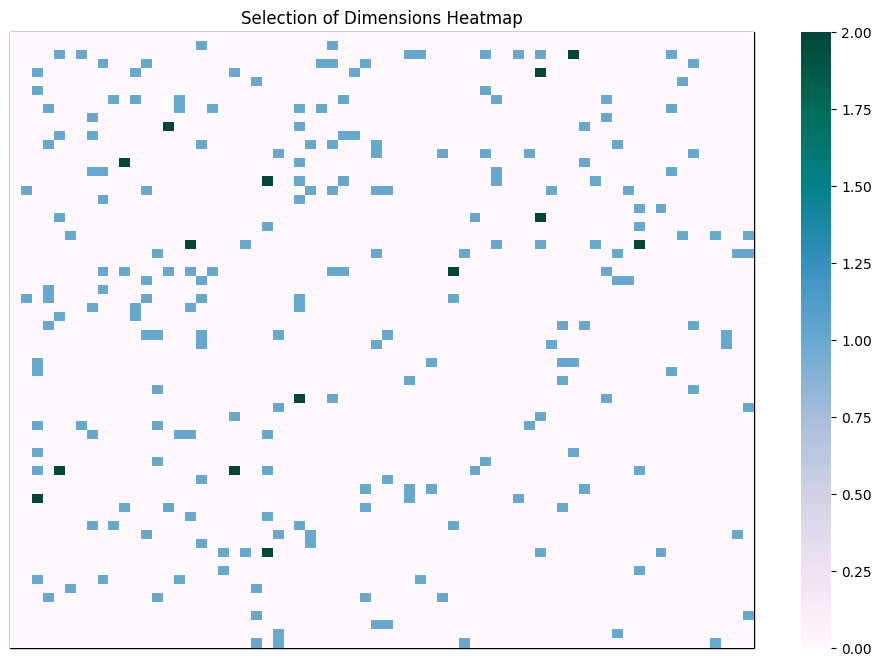

160


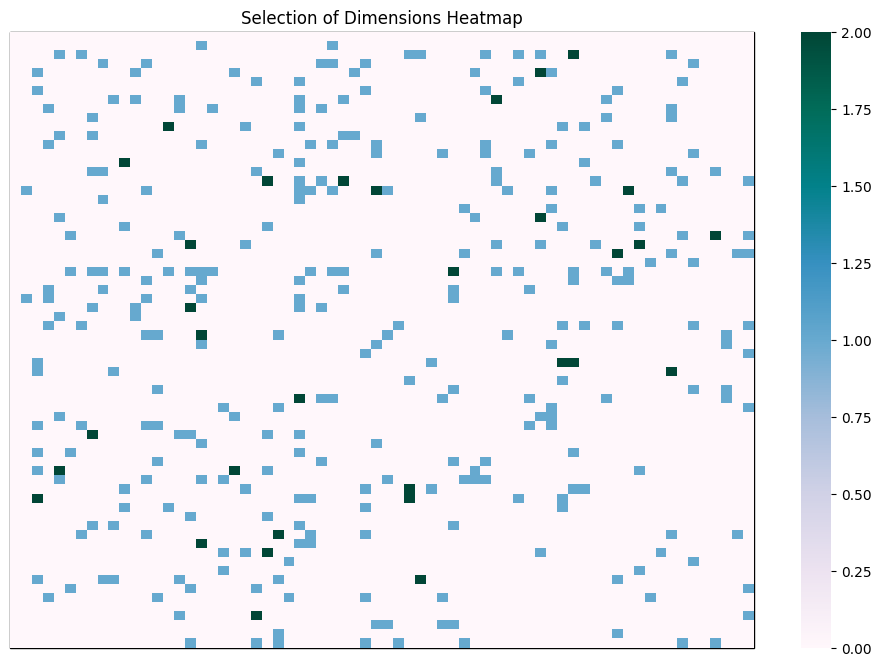

180


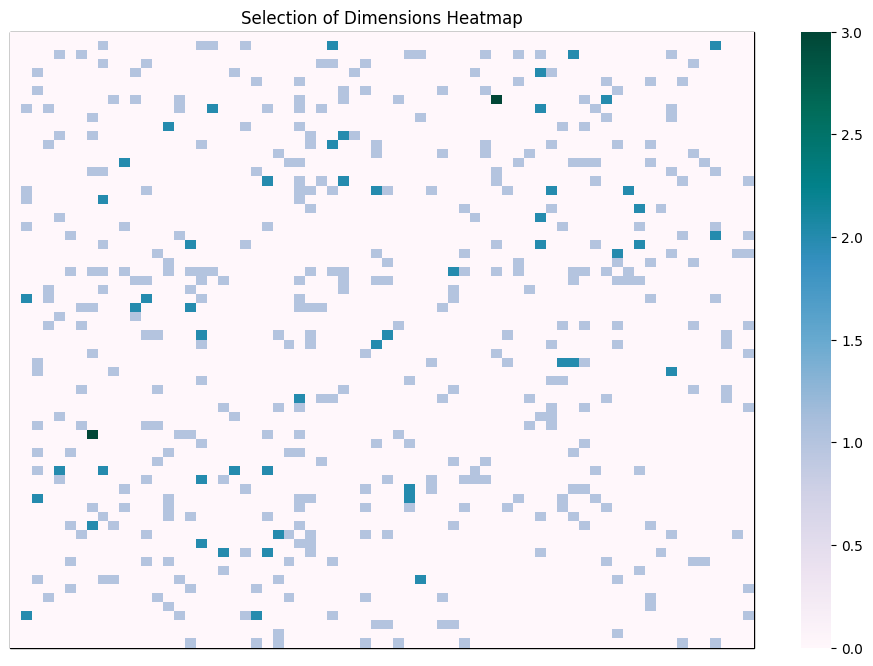

200


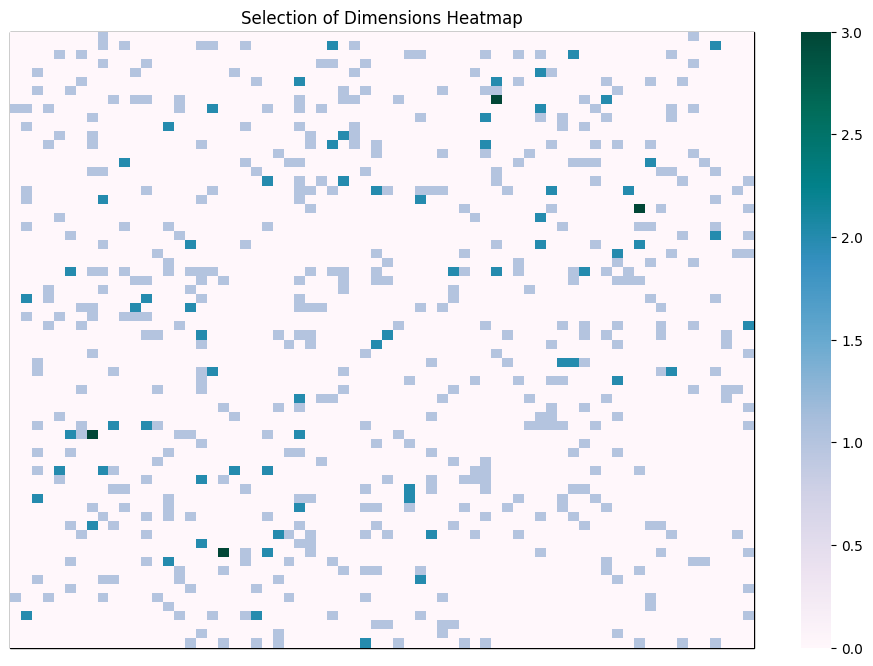

In [19]:
rank_list = rank_list[100:201].reset_index(drop=True)
sparse = cm._rank_list_to_sparse(rank_list)

plot_df = pd.DataFrame(columns=sparse.columns, index=sparse.columns)
plot_df.fillna(0, inplace=True)

for row in range(len(rank_list[:100])+1):
    curr_cut = rank_list[1].iloc[row]
    a = curr_cut[0]
    b = curr_cut[1]
    c = curr_cut[2]
    
    plot_df[f'col_{a}'].loc[f'col_{b}'] += 1
    plot_df[f'col_{a}'].loc[f'col_{c}'] += 1

    plot_df[f'col_{b}'].loc[f'col_{a}'] += 1
    plot_df[f'col_{b}'].loc[f'col_{c}'] += 1

    plot_df[f'col_{c}'].loc[f'col_{a}'] += 1
    plot_df[f'col_{c}'].loc[f'col_{b}'] += 1

    if (row % 20 == 0) and (row>19):
        print(row+100)
        plot_heatmap(plot_df, row+1000)

## Study doubles-triples-singles

In [24]:
# Get all CSV files in the folder starting with "rank"
pickle_files = glob.glob("temp_files/rank_list_*.pickle")
# Concatenate all DataFrames into a single DataFrame
rank_list = pd.concat(_read_rank_list(f) for f in pickle_files)

rank_list.reset_index(inplace=True, drop=True)
rank_list['cut_round'] = (rank_list.index // 100) + 1 

print(rank_list.shape)

(1985, 7)


In [20]:
unique_doubles = calculate_doubles(rank_list[:100])
len(unique_doubles[unique_doubles['count']>1])/100

0.37

In [21]:
def calculate_doubles(rank_list):
    doubles = []
    singles = []
    for row in range(len(rank_list)):
        A = rank_list.iloc[row]['A']
        B = rank_list.iloc[row]['B']
        C = rank_list.iloc[row]['C']

        doubles.append(f'{A},{B}')
        doubles.append(f'{A},{C}')
        doubles.append(f'{B},{C}')
        
        singles.append(f'{A}')
        singles.append(f'{B}')
        singles.append(f'{C}')
    
    doubles = pd.DataFrame(doubles).value_counts()
    unique_doubles = pd.DataFrame()
    unique_doubles['double']=doubles.index.values
    unique_doubles['count'] = doubles.values
    
    singles = pd.DataFrame(singles).value_counts()
    unique_singles = pd.DataFrame()
    unique_singles['single']=singles.index.values
    unique_singles['count'] = singles.values

    return unique_singles, unique_doubles

unique_singles, unique_doubles = calculate_doubles(rank_list)

In [22]:
unique_singles

,single,count
0,"(34,)",12
1,"(25,)",9
2,"(40,)",7
3,"(5,)",7
4,"(16,)",7
...,...,...
63,"(29,)",2
64,"(7,)",2
65,"(8,)",2
66,"(68,)",1


In [23]:
unique_singles['count'].sum()

303